# **Follow Up 1**



* Alejandro Betancur Quiroz 
* Mateo Cano Solis 
* Keyla Jeaneth García Jaimes 


## **Importación de librerias**




In [215]:
# importing libraries
from PIL import Image             # Python Imaging Library
import numpy as np                # Numerical Python 
import matplotlib.pyplot as plt   # Python plotting
%matplotlib inline

## **Lectura del archivo**

In [216]:
#Read the image and convert it to double.
I = Image.open('/content/lena_gray_512.tif')
type(I)

PIL.TiffImagePlugin.TiffImageFile

Se imprime la imagen

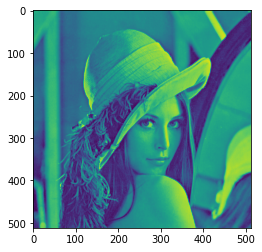

In [217]:
plt.imshow(np.asarray(I))
plt.show()

## **Conversión Imagen**

Inicialmente se convierte la imagen a gris, y luego a binario

In [218]:
I1 = I.convert('L') # 'L' for gray scale mode (escala de grises)
I2 = I1.convert('1')  # '1' for Binary image, only black and withe 

Posterior se crea una matriz con la imagen binaria

In [250]:
a = np.asarray(I2,dtype=np.float64)

## **Creación `mask`**

Se crea una matriz de 0 con el mismo tamaño de la matriz de la imagen

In [220]:
#Create a matrix of the same dimensions filled with zeros.
A = np.zeros((a.shape[0],a.shape[1]))

Se establece la función que crea la `mask`, en esta se define el radio requerido

In [234]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask


Se aplica la función, y para los elementos que no esten en el circulo se brinda el valor de 0 (negro total)

In [255]:
h, w = A.shape[:2]
mask = create_circular_mask(h, w, radius =150)
masked_img = a.copy()
masked_img[~mask] = 0.0

## **Resultado**

### **Resultado Circulo total**

Este es el resultado final

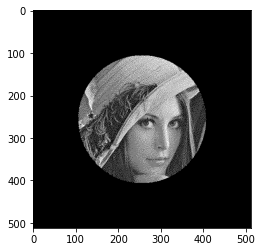

In [253]:
Im = Image.fromarray(masked_img)
plt.imshow(masked_img, cmap = "gray")
plt.show()

Aplicandolo con multiplicación de matrices

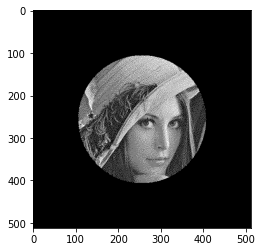

In [273]:
h, w = A.shape[:2]
mask = create_circular_mask(h, w, radius =150)
a1 = a.copy()
A[~mask] = 0
masked = a1 * A
plt.imshow(masked, cmap = "gray")

### **Resultado Circulo degradado**

Se establece una intensidad media de 0.25 para que se vea degradado

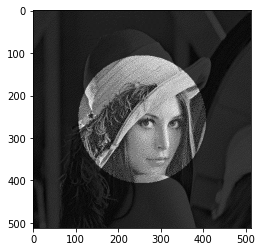

In [271]:
h, w = A.shape[:2]
mask = create_circular_mask(h, w, radius =150)
a1 = a.copy()
A[~mask] = 0.25
masked = a1 * A
plt.imshow(masked, cmap = "gray")